In [1]:
import tensorflow as tf
from tensorflow.python.framework import ops 

from collections import Counter 
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# dir path for sample dataset
dir_path = os.getcwd() 
dataset_path = dir_path + '\\Dataset\\'
dataset2_path = dir_path + '\\Dataset2\\'
print(dataset_path)

C:\Users\adilf\Deeplearning Projects\hackerearth#5\Dataset\


In [3]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [84]:
X = []
Y = []

x_true = []
x_false = []

In [85]:
# Dataset1

for folderName, subfolders, filenames in os.walk(dataset_path):
    for subfolder in subfolders:
        for _,sF,_ in os.walk(dataset_path+subfolder):
            if(len(sF) != 0):
                for _,_,im in os.walk(dataset_path+subfolder+'\\'+sF[0]+'\\'):
                    for i in im:
                        temp_img = image.load_img(dataset_path + subfolder + '\\' + sF[0] + '\\' + i, target_size=(224,224))
                        temp_img = image.img_to_array(temp_img)
                        X.append(temp_img)
                        x_true.append(temp_img)
                        Y.append(1)
                for _,_,im in os.walk(dataset_path+subfolder+'\\'+sF[1]+'\\'):
                    for i in im:
                        temp_img = image.load_img(dataset_path + subfolder + '\\' + sF[1] + '\\' + i, target_size=(224,224))
                        temp_img = image.img_to_array(temp_img)
                        X.append(temp_img)
                        x_false.append(temp_img)
                        Y.append(0)
'''
# Dataset2
for _, subfolders, _  in os.walk(dataset2_path + 'Train\\'):
    for subfolder in subfolders:
        if subfolder == '1':
            for _, _, files in os.walk(dataset2_path + 'Train\\' + subfolder):
                for im in files:
                    temp_img = image.load_img(dataset2_path + 'Train\\' + subfolder + '\\' + im,target_size=(400,400))
                    temp_img = image.img_to_array(temp_img)
                    X.append(temp_img / 255)
                    x_true.append(temp_img / 255)
#                     L.append(temp_img.shape[0])
#                     W.append(temp_img.shape[1])
                    Y.append(1) 
            
        elif subfolder == '0':
            for _, _, files in os.walk(dataset2_path + 'Train\\' + subfolder):
                for im in files:
                    temp_img = image.load_img(dataset2_path + 'Train\\' + subfolder + '\\' + im,target_size=(400,400))
                    temp_img = image.img_to_array(temp_img)
                    X.append(temp_img / 255)
                    x_false.append(temp_img / 255)
#                     L.append(temp_img.shape[0])
#                     W.append(temp_img.shape[1])
                    Y.append(0)
'''

In [86]:
X = np.array(X)
Y = np.array(Y)

x_true = np.array(x_true)
x_false = np.array(x_false)

X /= 255
x_true /= 255
x_false /= 255

In [87]:
x_false.shape

(20, 400, 400, 3)

In [92]:
from keras.preprocessing.image import ImageDataGenerator
datagen_true = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=False,
        fill_mode='nearest')

datagen_false = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=False,
        fill_mode='nearest')
datagen_true.fit(x_true)
datagen_false.fit(x_false)

In [ ]:
X_aug = []
Y_aug = []

In [94]:
i = 0
for batch in datagen_true.flow(x_true, y=None, batch_size=32):
    i = i + 1
    if i >= 30:
        break
    for img in batch:
        X_aug.append(img)
        Y_aug.append(1)

In [ ]:
i = 0
for batch in datagen_true.flow(x_false, y=None, batch_size=32):
    i = i + 1
    if i >= 30:
        break
    for img in batch:
        X_aug.append(img)
        Y_aug.append(0)

In [17]:
X_aug = np.array(X_aug)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


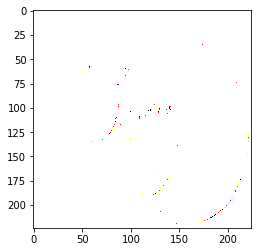

In [23]:
import h5py
with h5py.File('X_augment.h5', 'w') as hf:
    hf.create_dataset("X_aug",  data=X_aug)
with h5py.File('Y_augment.h5', 'w') as hf:
    hf.create_dataset("Y_aug",  data=Y_aug)